In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier #FOR ROC CURVE
from sklearn.metrics import cohen_kappa_score

In [3]:
df = pd.read_csv("df_norm.csv", 
                 index_col = 0)

In [7]:
class_names = df['CLASS']
class_names = class_names.tolist()
col_names = df.columns
class_label = np.unique(class_names)

In [4]:
df.shape

(200, 35)

Separando o dataset em Treino/Teste

In [8]:
X = df.drop('CLASS',axis=1)
Y = df['CLASS']

Binarizando... ou Melhor hot-enconding???  
Estou usando binarize devido a curva ROC, OneVsAll


In [10]:
Y_bin = label_binarize(df['CLASS'], 
                       classes=class_label)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y_bin, 
                                                    test_size=0.2,
                                                    stratify=class_names)
y_true = np.argmax(y_test, axis = 1) ## VETORIZANDO PARA AS FUNCOES ABAIXO

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn3_res = knn.predict(X_test)
y_pred_knn3 = np.argmax(knn3_res, axis=1)

In [14]:
KNN3_cm = confusion_matrix(y_true=y_true, 
                           y_pred=y_pred_knn3)

Text(0.5, 1.0, 'Heatmap for KNN Classification Model')

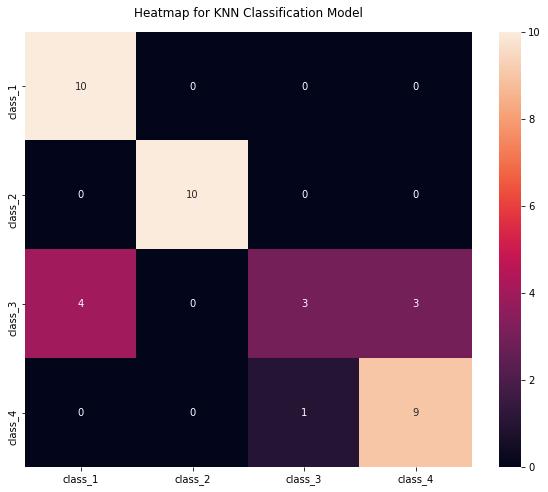

In [15]:
plt.figure(figsize = (10,8))
ax = plt.axes()
x_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for x-axis
y_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for y-axis
sns.heatmap(KNN3_cm,
            vmin=0,
            vmax=10,
            annot=True,
            fmt="d",
            ax = ax,
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels)
ax.set_title('Heatmap for KNN Classification Model',pad=15)

In [16]:
print(classification_report(y_true,y_pred_knn3, target_names=class_label))
print("Acurácia:",accuracy_score(y_true,y_pred_knn3))

              precision    recall  f1-score   support

     class_1       0.71      1.00      0.83        10
     class_2       1.00      1.00      1.00        10
     class_3       0.75      0.30      0.43        10
     class_4       0.75      0.90      0.82        10

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.77        40
weighted avg       0.80      0.80      0.77        40

Acurácia: 0.8


REFINANDO PARAMETROS KNN

In [17]:
k_list = list(range(1,31))
knn_param = dict(n_neighbors=k_list)

In [18]:
# crossvalidation with 10 folds
grid = GridSearchCV(knn,
                    knn_param, 
                    cv=10, 
                    scoring='accuracy')

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [21]:
for i in ['mean_test_score']:
        print(i," : ",grid.cv_results_[i])
        scores = grid.cv_results_['mean_test_score']

mean_test_score  :  [0.76875 0.63125 0.75625 0.6375  0.7125  0.66875 0.725   0.65    0.69375
 0.64375 0.68125 0.6375  0.66875 0.61875 0.675   0.6125  0.6375  0.6
 0.63125 0.58125 0.6125  0.55625 0.59375 0.5625  0.575   0.525   0.54375
 0.50625 0.51875 0.4875 ]


Se eu mudo os Y para Y_bin já zika .....  
seguindo o .fit com o x_train e y_train

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.76875 


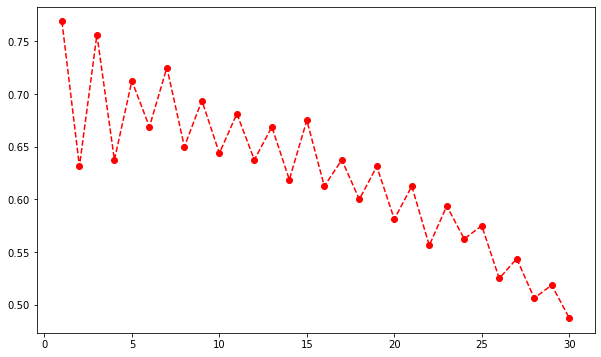

In [22]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')

KNN com melhor parametro

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn1_res = knn.predict(X_test)
y_pred_knn1 = np.argmax(knn1_res, axis=1)
y_predp_knn1 = knn.predict_proba(X_test)

In [28]:
KNN1_cm = confusion_matrix(y_true=y_true, 
                           y_pred=y_pred_knn1)

Text(0.5, 1.0, 'Heatmap for KNN Classification Model')

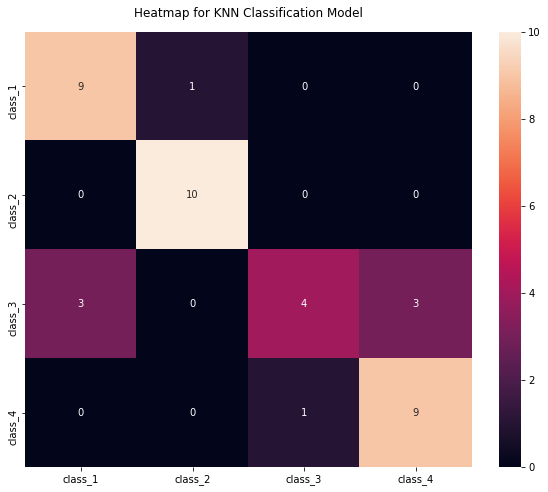

In [29]:
plt.figure(figsize = (10,8))
ax = plt.axes()
x_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for x-axis
y_axis_labels = ['class_1', 'class_2', 'class_3', 'class_4'] # labels for y-axis
sns.heatmap(KNN1_cm,
            vmin=0,
            vmax=10,
            annot=True,
            fmt="d",
            ax = ax,
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels)
ax.set_title('Heatmap for KNN Classification Model',pad=15)

In [30]:
print(classification_report(y_true, y_pred_knn1, target_names=class_label))
print(accuracy_score(y_true, y_pred_knn1))

              precision    recall  f1-score   support

     class_1       0.75      0.90      0.82        10
     class_2       0.91      1.00      0.95        10
     class_3       0.80      0.40      0.53        10
     class_4       0.75      0.90      0.82        10

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.78        40
weighted avg       0.80      0.80      0.78        40

0.8


recall is the same of sensitivity  
The name sensitivity comes from the statistics domain as a measure for the performance of a binary classification, while recall is more related to the Information Engineering domain.


ROC Curve

Essa função tive que usar para conseguir usar a função ROC

In [31]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1))
y_pred_ovr_knn1 = clf.fit(X_train, y_train).predict_proba(X_test)

In [32]:
# Compute ROC curve and ROC area for each class
fpr_KNN1 = dict()
tpr_KNN1 = dict()
roc_auc_KNN1 = dict()
for i in range(class_label.shape[0]):
    fpr_KNN1[i], tpr_KNN1[i], _ = roc_curve(y_test[:, i], y_pred_ovr_knn1[:, i])
    roc_auc_KNN1[i] = auc(fpr_KNN1[i], tpr_KNN1[i])

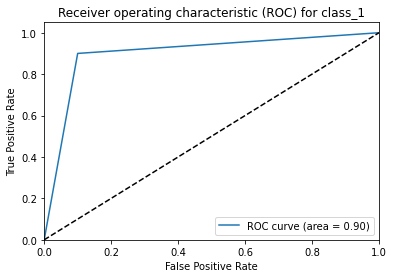

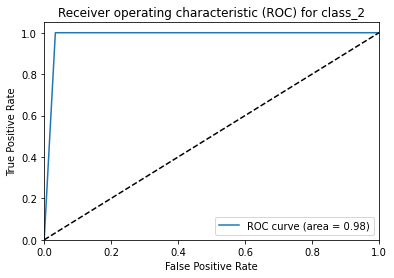

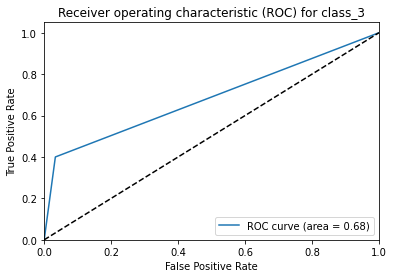

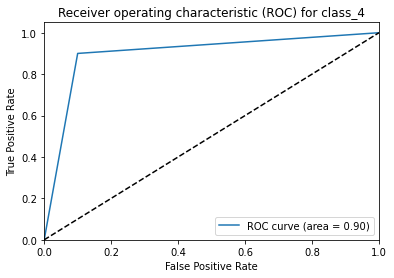

In [33]:
# Plot of a ROC curve for a specific class
for i in range(class_label.shape[0]):
    plt.figure()
    plt.plot(fpr_KNN1[i], tpr_KNN1[i], label='ROC curve (area = %0.2f)' % roc_auc_KNN1[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) for %s' % class_label[i])
    plt.legend(loc="lower right")
    plt.show()

Esse coeficiente ??????

In [34]:
knn_kappa = cohen_kappa_score(y_true, y_pred_knn1)
knn_kappa

0.7333333333333334

In [35]:
FP = KNN1_cm.sum(axis=0) - np.diag(KNN1_cm) 
FN = KNN1_cm.sum(axis=1) - np.diag(KNN1_cm)
TP = np.diag(KNN1_cm)
TN = KNN1_cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensibilidade, taxa de acerto, recall ou taxa de true positive 
TPR = TP/(TP+FN)
print("Sensibilidade:\t", TPR)
# Especificidade ou taxa de true negative
TNR = TN/(TN+FP) 
print("True Negative:\t", TNR)
# Precisao
PPV = TP/(TP+FP)
print("Precisão:\t", PPV)
# Predicao negativa
NPV = TN/(TN+FN)
print("Pred. Negativa:\t", NPV)
# False positive
FPR = FP/(FP+TN)
print("False Positive: ", FPR)
# False negative
FNR = FN/(TP+FN)
print("False Negative:\t", FNR)
# False discovery
FDR = FP/(TP+FP)
print("F Discovery:\t", FDR)
# Accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Acurácia:\t", ACC)

Sensibilidade:	 [0.9 1.  0.4 0.9]
True Negative:	 [0.9        0.96666667 0.96666667 0.9       ]
Precisão:	 [0.75       0.90909091 0.8        0.75      ]
Pred. Negativa:	 [0.96428571 1.         0.82857143 0.96428571]
False Positive:  [0.1        0.03333333 0.03333333 0.1       ]
False Negative:	 [0.1 0.  0.6 0.1]
F Discovery:	 [0.25       0.09090909 0.2        0.25      ]
Acurácia:	 [0.9   0.975 0.825 0.9  ]
